<center> <h1>  Group Uranus - Phase 2 Project </h1> </center>


<center> <img src="./images/skyline.jpeg" alt="King County Skyline" width="800"/> </center>

<center> <h2> Contributors:  Brad Blackwood, Ashley Eakland and Jalen Charles </h2> </center>

### Project Proposal: A user-friendly tool to predict pricing of homes using just a few key metrics, accomplished using multiple linear regression analysis.


### Business Understanding
##### Utilizing the CRISP-DM process, it is our goal with this project to present to both home buyers and sellers a user friendly tool to accurately predict the price of a home based on a few key metrics. The first step in this process is understanding the business, which in this case would be the consumer benefit of having a user friendly tool for home price predictions.

### Data Understanding and Preparation
##### For this analysis, and the second and third steps of the CRISP-DM process, we will gain a better understanding of our dataset. Utilizing the column names and descriptions below, as well as the following code blocks, we discovered the following:

* This is a dataset of home sales in King County, Washington containing over unique 21,500 home sale data points.

* Data includes:
    * `id` - Unique ID number for a home
    * `date` - Date home was sold - this dataset contains sales from May 2014 through May 2015
    * `price` - Sale price - which is our prediction target for this project
    * `bedrooms` - Number of bedrooms in the home
    * `bathrooms` - Number of bathrooms in the home
    * `sqft_living` - Square footage of living space in the home
    * `sqft_lot` - Square footage of the lot 
    * `floors` - Number of floors (levels) in the home
    * `waterfront` - Whether the home is on a waterfront, represented as `YES` or `NO` (includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts)
    * `view` - Quality of view from the home ranked from `NONE` to `EXCELLENT` (includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other)
    * `condition` - How good the overall condition of the house is. Related to maintenance of house and ranked 1 through 5 with 1 being `Poor` and 5 being `Very Good` (see the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) breakdown of each condition rating specifics.)
    * `grade` - Overall grade of the house. Related to the construction and design of the house and rated 1 through 13 with 1 being short of minimum building standards and 13 being custom designed and built or "mansion" quality (see the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for breakdown of what each grade covers specifically)
    * `sqft_above` - Square footage of house above ground level/separate from the basement
    * `sqft_basement` - Square footage of the basement
    * `yr_built` - Year when house was built
    * `yr_renovated` - Year when house was renovated, if applicable
    * `zipcode` - ZIP Code used by the United States Postal Service
    * `lat` - Latitude coordinate
    * `long` - Longitude coordinate
    * `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
    * `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors
    
* Preliminary analysis shows strongest correlation with prediction target in the `sqft_living` column. This will be our focus feature.
* Null values are seen in few columns in this dataset, with affected columns only being `waterfront`, `view`, and `yr_renovated`. Further data analysis renders these columns irrelevant to our end goal, and thus no preparation or futher investigation into these nulls needed.
* Zip Codes are targeted as an important predictor into a homes value - as they say, "location, location, location!". However, Zip Codes are categorical (or discrete variable), and therefore need to be handled differently than a continuous variable in order to be modeled. We opted to utilize Pandas pd.get_dummies to One Hot Encode the Zip Codes. 
* Lat/Long were used to plot the Zip Codes on an interactive map utilizing the Folium library, that then pulled in the median home price for that respective Zip Code. 
* Data preparation is complete and ready for modeling.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import OLS
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder

In [75]:
df = pd.read_csv('data/kc_house_data.csv', index_col='id')

In [76]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

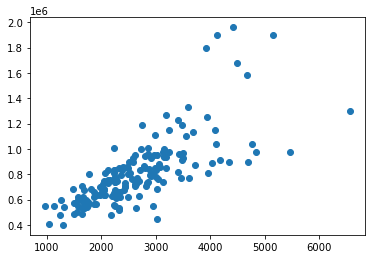

In [77]:
y = df[df['zipcode'] == 98005]['price']
x = df[df['zipcode'] == 98005]['sqft_living']

plt.scatter(x, y)

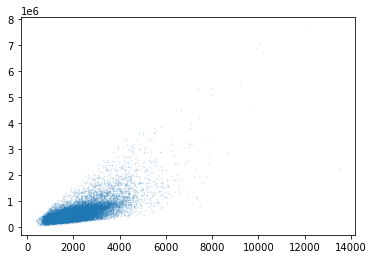

In [78]:
# sqft_living
# price

x = df['sqft_living']
y = df['price']

plt.scatter(x, y, alpha = .15, s= .4)

In [79]:
df[df['zipcode'] == 98005].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.293229,0.602608,0.740920,0.566596,0.435987,0.777308,0.427175,0.098636,NaN,0.529695,0.198970,0.674625,0.397516
bedrooms,0.293229,1.000000,0.362850,0.545460,0.299922,0.084771,0.302207,0.026695,-0.081983,NaN,0.218388,0.143646,0.275105,0.222452
bathrooms,0.602608,0.362850,1.000000,0.716835,0.383228,0.478232,0.620989,0.550833,0.041331,NaN,0.387685,0.226978,0.536440,0.345951
sqft_living,0.740920,0.545460,0.716835,1.000000,0.510779,0.426776,0.786090,0.401876,0.004121,NaN,0.499581,0.185618,0.658809,0.403712
sqft_lot,0.566596,0.299922,0.383228,0.510779,1.000000,0.321917,0.504037,0.166455,-0.013749,NaN,0.611847,0.283477,0.600156,0.619629
floors,0.435987,0.084771,0.478232,0.426776,0.321917,1.000000,0.652533,0.620710,-0.102883,NaN,0.388322,0.342794,0.418034,0.221950
sqft_above,0.777308,0.302207,0.620989,0.786090,0.504037,0.652533,1.000000,0.454368,0.079430,NaN,0.546579,0.259574,0.696711,0.399360
yr_built,0.427175,0.026695,0.550833,0.401876,0.166455,0.620710,0.454368,1.000000,-0.211315,NaN,0.238243,0.361009,0.318313,0.161520
yr_renovated,0.098636,-0.081983,0.041331,0.004121,-0.013749,-0.102883,0.079430,-0.211315,1.000000,NaN,0.040105,-0.041954,-0.081255,0.020770
zipcode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

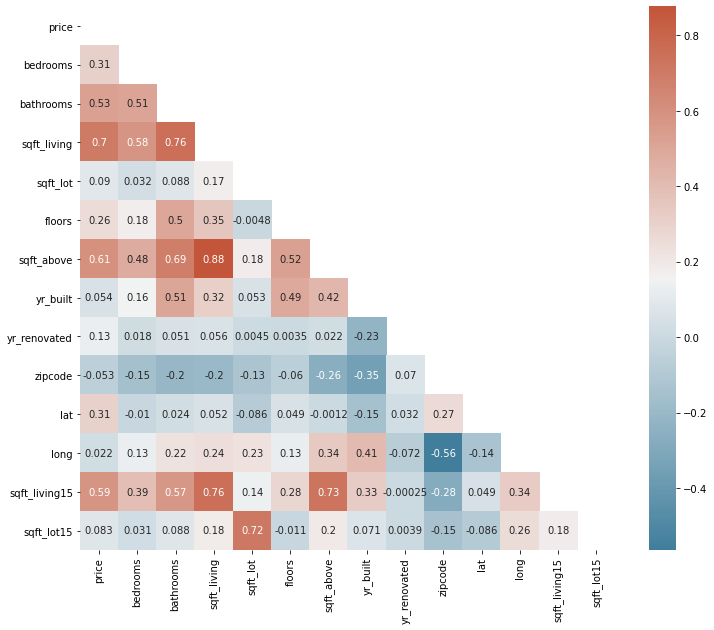

In [80]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [81]:
zipcodes = pd.get_dummies(df.zipcode)
zip_cat = pd.concat([df, zipcodes], axis=1) # df with OHE by zipcode # no dropped columns

In [82]:
box_df = zip_cat.copy()
box_df = box_df[['price', 'bedrooms', 'bathrooms', 'sqft_living']]
box_df.head()

,price,bedrooms,bathrooms,sqft_living
id,,,,
7129300520,221900.0,3,1.00,1180
6414100192,538000.0,3,2.25,2570
5631500400,180000.0,2,1.00,770
2487200875,604000.0,4,3.00,1960
1954400510,510000.0,3,2.00,1680


/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


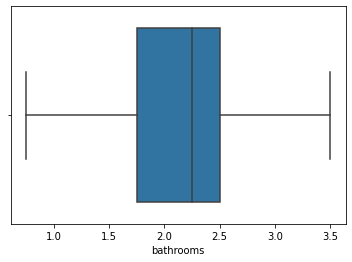

In [83]:
import seaborn as sns
sns.boxplot(box_df['bathrooms'], showfliers=False);


/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


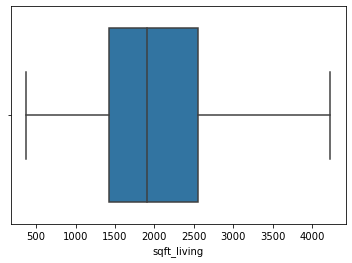

In [84]:
sns.boxplot(box_df['sqft_living'], showfliers=False);

/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


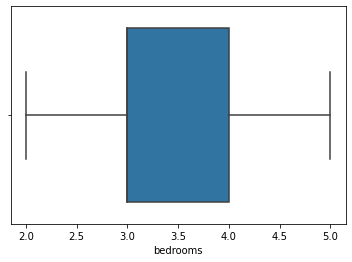

In [85]:
sns.boxplot(box_df['bedrooms'],showfliers=False);

/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


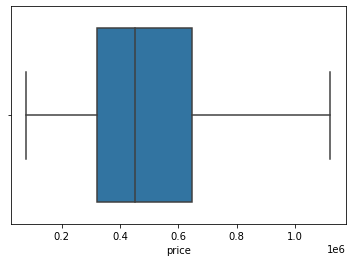

In [86]:
from matplotlib.ticker import ScalarFormatter
ax = sns.boxplot(box_df['price'],showfliers=False);
# plt.ticklabel_format(style='plain')

In [87]:
# zip_cat -- Entire df + Zipcode(OHE)
# zip_price -- Price + Sqft_living + Zipcode(OHE)
# grade_cat -- Price + Sqft_living + Zipcode(OHE) + Grade(OHE)

### Modeling
* 
* 
* 

In [88]:
# SIMPLE LINEAR REGRESSION (X = SQFT, Y = PRICE)

lr = LinearRegression()

x1 = np.array(df['sqft_living']).reshape(-1, 1) # reshape required for single feature
y1 = df['price']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=.2)

lr.fit(x1_train, y1_train)

lr.score(x1_test, y1_test)

# LOW R2 ~0.47

0.49432776231419373

In [89]:
# MODELED USING X = ZIPCODES(OHE), Y = PRICE

x2 = zipcodes
y2 = df.price

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=.2)

lr.fit(x2_train, y2_train)

lr.score(x2_test, y2_test)

# LOW R2 ~0.44

0.394417479147952

In [90]:
# MULTIPLE LINEAR REGREESSION INCLUDING X = SQFT + ZIPCODES(OHE), Y = PRICE

zip_price = pd.concat([df.price, df.sqft_living, zipcodes], axis=1)

y3 = zip_price.price
x3 = zip_price.drop('price', axis=1)

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=.2)

lr.fit(x3_train, y3_train)

lr.score(x3_test, y3_test) 

# TOGETHER SQUARE FOOTAGE AND ZIPCODES CORRELATE MUCH BETTER TO SALE PRICE
# R2 ~ .72

0.7233396330835742

In [91]:
# MULTIPLE LINEAR REGREESSION INCLUDING X = SQFT + ZIPCODES(OHE) + GRADE(OHE), Y = PRICE

grade_cat = pd.concat([zip_price, pd.get_dummies(df.grade)], axis=1)

y4 = grade_cat.price
x4 = grade_cat.drop('price', axis=1)

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=.2)

lr.fit(x4_train, y4_train)

lr.score(x4_test, y4_test) 

# ADDITION OF GRADE OF HOME IMPROVES THE MODEL
# R2 ~ 0.78

# GRADE NOT STRAIGHTFORWARD FOR USER INPUT

0.7708791412411726

In [92]:
# OLS PRINTOUT OF 4TH ITTERATIVE MODEL

price = y4_train
preds = x4_train
test_lm1 = OLS(price,preds)
results = test_lm1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     784.6
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:05:52   Log-Likelihood:            -2.3291e+05
No. Observations:               17277   AIC:                         4.660e+05
Df Residuals:                   17196   BIC:                         4.666e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     175.7428      2.327     75.515      0.000     171.181     180.304
98001         -1.437e+05   1.06e+04    -13.615      0.000   -1.64e+05   -1.23e+05
98002         -1.293e+05   1.41e+04     -9.175      0.000   -1.57e+05   -1.02e+05
98003         -1.375e+05   1.19e+04    -11.516      0.000   -1.61e+05   -1.14e+05
98004          6.296e+05   1.13e+04     55.702      0.000    6.07e+05    6.52e+05
98005          1.641e+05   1.56e+04     10.499      0.000    1.33e+05    1.95e+05
98006          1.287e+05   9270.535     13.886      0.000    1.11e+05    1.47e+05
98007          1.139e+05   1.62e+04      7.015      0.000    8.21e+04    1.46e+05
98008          1.678e+05   1.17e+04     14.399      0.000    1.45e+05    1.91e+05
98010         -6.996e+04   1.92e+04     -3.649      0.000   -1.08e+05   -3.24e+04
98011         -1.392e+04   1.42e+04     -0.981      0.326   -4.17e+04    1.39e+04
98014         -4.607e+04   1.72e+04     -2.674      0.008   -7.98e+04   -1.23e+04
98019         -6.001e+04   1.37e+04     -4.372      0.000   -8.69e+04   -3.31e+04
98022         -9.464e+04    1.3e+04     -7.287      0.000    -1.2e+05   -6.92e+04
98023         -1.696e+05   9072.956    -18.691      0.000   -1.87e+05   -1.52e+05
98024          2.862e+04   2.27e+04      1.260      0.208   -1.59e+04    7.32e+04
98027          2.182e+04   9894.180      2.206      0.027    2430.618    4.12e+04
98028         -7029.2829   1.18e+04     -0.597      0.551   -3.01e+04    1.61e+04
98029          6.632e+04   1.11e+04      5.985      0.000    4.46e+04     8.8e+04
98030         -1.379e+05   1.22e+04    -11.297      0.000   -1.62e+05   -1.14e+05
98031         -1.264e+05   1.22e+04    -10.343      0.000    -1.5e+05   -1.02e+05
98032         -1.384e+05   1.73e+04     -7.999      0.000   -1.72e+05   -1.04e+05
98033           2.18e+05   9779.954     22.295      0.000    1.99e+05    2.37e+05
98034          7.038e+04   8553.039      8.229      0.000    5.36e+04    8.71e+04
98038         -1.098e+05   8613.082    -12.748      0.000   -1.27e+05   -9.29e+04
98039          1.088e+06   2.59e+04     41.986      0.000    1.04e+06    1.14e+06
98040          4.296e+05   1.18e+04     36.394      0.000    4.06e+05    4.53e+05
98042         -1.325e+05   8757.836    -15.133      0.000    -1.5e+05   -1.15e+05
98045         -3.204e+04   1.29e+04     -2.480      0.013   -5.74e+04   -6720.376
98052          9.152e+04   8615.077     10.623      0.000    7.46e+04    1.08e+05
98053          6.252e+04   9849.215      6.348      0.000    4.32e+04    8.18e+04
98055         -9.681e+04    1.2e+04     -8.057      0.000    -1.2e+05   -7.33e+04
98056         -4.406e+04      1e+04     -4.391      0.000   -6.37e+04   -2.44e+04
98058          -1.09e+05   9369.665    -11.637      0.000   -1.27e+05   -9.07e+04
98059         -6.558e+04   9533.638     -6.879   

In [93]:
# Model Choosen

# X = SQFT_LIVING, ZIPCODES(OHE), BEDROOMS, BATHROOMS
# Y = PRICE
#def choosen_model():
y6 = df.price
x6 = pd.concat([df.sqft_living, df.bedrooms, df.bathrooms, zipcodes], axis=1)

x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size=.2)

lr.fit(x6_train, y6_train)

lr.score(x6_test, y6_test)
    

#choosen_model()

# R2 ~ 0.74

0.7487583684112211

In [94]:
# OLS PRINTOUT OF ABOVE MODEL

price = y6_train
preds = x6_train
test_lm1 = OLS(price,preds)
results = test_lm1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     664.7
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:05:53   Log-Likelihood:            -2.3441e+05
No. Observations:               17277   AIC:                         4.690e+05
Df Residuals:                   17204   BIC:                         4.695e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   272.9158      2.675    102.007      0.000     267.672     278.160
bedrooms    -4.463e+04   1943.591    -22.963      0.000   -4.84e+04   -4.08e+04
bathrooms    8195.9717   2963.362      2.766      0.006    2387.481     1.4e+04
98001       -1.075e+05   1.25e+04     -8.585      0.000   -1.32e+05    -8.3e+04
98002       -8.136e+04   1.59e+04     -5.115      0.000   -1.13e+05   -5.02e+04
98003       -9.858e+04   1.42e+04     -6.937      0.000   -1.26e+05   -7.07e+04
98004        7.169e+05   1.35e+04     53.029      0.000     6.9e+05    7.43e+05
98005        2.322e+05   1.73e+04     13.434      0.000    1.98e+05    2.66e+05
98006        2.221e+05   1.16e+04     19.077      0.000    1.99e+05    2.45e+05
98007        1.771e+05   1.88e+04      9.443      0.000     1.4e+05    2.14e+05
98008        2.137e+05   1.41e+04     15.151      0.000    1.86e+05    2.41e+05
98010        -1.85e+04   2.28e+04     -0.811      0.417   -6.32e+04    2.62e+04
98011         1.97e+04   1.64e+04      1.200      0.230   -1.25e+04    5.19e+04
98014       -5982.3274      2e+04     -0.299      0.765   -4.52e+04    3.32e+04
98019        -3.69e+04   1.64e+04     -2.247      0.025   -6.91e+04   -4707.534
98022       -5.503e+04   1.49e+04     -3.692      0.000   -8.42e+04   -2.58e+04
98023       -1.208e+05   1.11e+04    -10.860      0.000   -1.43e+05    -9.9e+04
98024        8.278e+04   2.59e+04      3.193      0.001     3.2e+04    1.34e+05
98027         6.82e+04   1.24e+04      5.520      0.000     4.4e+04    9.24e+04
98028        2.084e+04    1.4e+04      1.493      0.135   -6516.540    4.82e+04
98029        1.206e+05   1.34e+04      9.002      0.000    9.44e+04    1.47e+05
98030       -1.016e+05   1.46e+04     -6.959      0.000    -1.3e+05    -7.3e+04
98031       -8.625e+04   1.41e+04     -6.130      0.000   -1.14e+05   -5.87e+04
98032       -8.595e+04   1.96e+04     -4.393      0.000   -1.24e+05   -4.76e+04
98033        2.991e+05   1.19e+04     25.183      0.000    2.76e+05    3.22e+05
98034        1.221e+05   1.06e+04     11.499      0.000    1.01e+05    1.43e+05
98038       -8.514e+04   1.06e+04     -8.011      0.000   -1.06e+05   -6.43e+04
98039        1.234e+06   3.08e+04     40.004      0.000    1.17e+06    1.29e+06
98040        4.912e+05   1.44e+04     34.040      0.000    4.63e+05    5.19e+05
98042        -9.31e+04   1.06e+04     -8.747      0.000   -1.14e+05   -7.22e+04
98045        8321.2554   1.53e+04      0.545      0.585   -2.16e+04    3.82e+04
98052        1.394e+05   1.08e+04     12.865      0.000    1.18e+05    1.61e+05
98053        8.529e+04   1.22e+04      7.005      0.000    6.14e+04    1.09e+05
98055       -6.027e+04   1.41e+04     -4.270      0.000   -8.79e+04   -3.26e+04
98056        9287.3166    1.2e+04      0.775      0.439   -1.42e+04    3.28e+04
98058       -6.643e+04   1.15e+04     -5.75

In [95]:
def price_predictor():
    
    #choosen_model()
    
    beds = int(input('How many bedrooms?'))
    baths = float(input('How many bathrooms?'))
    sqft = int(input('How many square feet?'))
    zip_ = int(input('What is the zipcode?'))
    
    entry = pd.DataFrame(0, index=['sample'], columns=x6.columns)
    entry['bedrooms'] = beds
    entry['bathrooms'] = baths
    entry['sqft_living'] = sqft
    entry[zip_] = 1
    
    price_target = f'${round(float(lr.predict(entry)), 2)}'
    return price_target

price_predictor()

How many bedrooms?3
How many bathrooms?2
How many square feet?1111
What is the zipcode?98117


'$420622.69'

actual price = $302000
predicted price = $144656.5


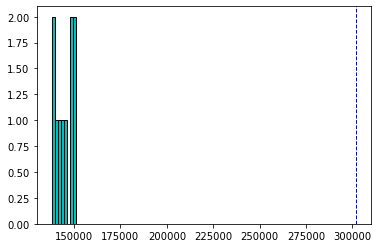

In [96]:
import random
import seaborn as sns

def rep_model(x, y, reps=10):

    random_index = random.randint(0, x.shape[0])

    random_x = x.sample(random_state=random_index, axis=0)
    random_y = y.sample(random_state=random_index, axis=0)
    
    guesses = []
    
    for i in range(reps):
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)
        lr.fit(x_train, y_train)
        guesses.append(int(lr.predict(random_x)))
    
    print(f'actual price = ${int(random_y.values)}')
    print(f'predicted price = ${np.mean(guesses)}')
    
    plt.hist(x=guesses, bins=8, color='c', edgecolor='k')
    plt.axvline(random_y.values, color='b', linestyle='dashed', linewidth=1);
    
    return
    
rep_model(x6, y6, reps=10)

In [97]:
bed_bath = x6['bedrooms']/x6['bathrooms'] # CREATING RATIO FOR MODEL
calc_df = pd.concat([zip_price, bed_bath], axis=1)
calc_df.rename(columns={0: 'bed_over_bath'}, inplace=True)
# calc_df.corr()

# bed/bath has slight neg corr to price and sqft ~ -0.24, -0.32
# possibly try bath/bed

x10 = calc_df.drop('price', axis=1)
y10 = calc_df.price

x10_train, x10_test, y10_train, y10_test = train_test_split(x10, y10, test_size=.2)

lr.fit(x10_train, y10_train)

lr.score(x10_test, y10_test)

# R2 ~ 0.73

0.7185327547178036

In [98]:
bath_bed = x6['bathrooms']/x6['bedrooms'] # CREATING RATIO FOR MODEL 
calc_df2 = pd.concat([zip_price, bed_bath], axis=1)
calc_df2.rename(columns={0: 'bath_bed'}, inplace=True)

# calc_df2.corr()

# same corr as above ~ -0.24, -0.32

x11 = calc_df2.drop('price', axis=1)
y11 = calc_df2.price

x11_train, x11_test, y11_train, y11_test = train_test_split(x11, y11, test_size=.2)

lr.fit(x11_train, y11_train)

lr.score(x11_test, y11_test)

# R ~ 0.73

# no difference between testing variable independently or either ratio

0.7216291969727191

In [99]:
# MODEL WITH BEDROOMS VARIABLE EXCLUDED 

x12 = pd.concat([df.sqft_living, df.bathrooms, zipcodes], axis=1)
y12 = df.price

x12_train, x12_test, y12_train, y12_test = train_test_split(x12, y12, test_size=.2)

lr.fit(x12_train, y12_train)

lr.score(x12_test, y12_test)

0.7257652761569791

In [100]:
# ABOVE IS CLEAN

In [101]:
np.random.seed(42)
sample_pt = zip_cat.sample(1)
sample_pt_price = zip_cat.iloc[0,1]
sample = sample_pt.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                   'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                   'sqft_living15', 'sqft_lot15'], axis=1)

# Show my random sample off
print(f'Price of sample: ${sample_pt_price}')
sample

Price of sample: $221900.0


,bedrooms,bathrooms,sqft_living,98001,98002,98003,98004,98005,98006,98007,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
id,,,,,,,,,,,,,,,,,,,,,
6303401050,3,0.75,850,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [102]:
def train_lr_randomly(data, sample_pt=None, ntimes=100):
    
    rmse = []
    r2 = []
    point_predictions = [] if (sample_pt is not None) else None
    y7 = data.price
    x7 = data.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                       'sqft_living15', 'sqft_lot15'], axis=1)
    lr7 = LinearRegression()

    for i in range(ntimes):
        x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=.2)
        lr7.fit(x7_train, y7_train)
        y_hat = lr7.predict(x7_test)
        rmse.append(np.sqrt(mean_squared_error(y7_test, y_hat)))
        r2.append(lr7.score(x7_test, y7_test))

        if sample_pt is not None:
            y_hat_pt = lr7.predict(sample_pt)
            point_predictions.append(y_hat_pt[0])
                  
    return rmse, r2, point_predictions

In [103]:
#x axis actual prices, y axis normalize predictions
def train_lr_randomly(data, sample_pt=None, ntimes=100):
    
    rmse = []
    r2 = []
    point_predictions = [] if (sample_pt is not None) else None
    y7 = data.price
    x7 = data.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                       'sqft_living15', 'sqft_lot15'], axis=1)
    lr7 = LinearRegression()
    
    x_axis = [] # actual price
    y_axis = [] # % error

    for i in range(ntimes):
        x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=.2)
        lr7.fit(x7_train, y7_train)
        
        y_hat = lr7.predict(x7_test)
        
        x_axis.append(y7_test)
        y_axis.append((y_hat-y7_test)/y7_test)# predicted price - acutal price / actual price
        
        plt.scatter(x_axis, y_axis, s=.1, alpha=.2)
        plt.xlim(0,1000000)
        plt.ylim(-1, 1)
        
        rmse.append(np.sqrt(mean_squared_error(y7_test, y_hat)))
        r2.append(lr7.score(x7_test, y7_test))

        if sample_pt is not None:
            y_hat_pt = lr7.predict(sample_pt)
            point_predictions.append(y_hat_pt[0])
                  
    return rmse, r2, point_predictions

([189953.43559865048,
  186514.0562960305,
  184994.92517960852,
  178841.8198247315,
  184682.20266204185],
 [0.744623803667082,
  0.7385545430814306,
  0.7428758586681934,
  0.7298956199762343,
  0.7541472936061067],
 [155301.234375,
  138840.08203125,
  143472.6796875,
  138367.255859375,
  140760.95336914062])

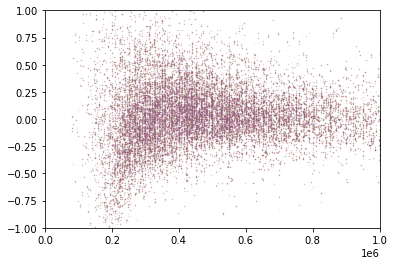

In [104]:
train_lr_randomly(data=zip_cat,sample_pt=sample, ntimes=5)

In [105]:
zip_cat.price.median()

450000.0

In [106]:
y7 = zip_cat.price
x7 = zip_cat.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                       'sqft_living15', 'sqft_lot15'], axis=1)
x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=.2)


linreg = LinearRegression()
linreg.fit(x7_train, y7_train)
y_hat_train = linreg.predict(x7_train)
y_hat_test = linreg.predict(x7_test)
train_res = y_hat_train - y7_train
test_res = y_hat_test - y7_test
mse_train = mean_squared_error(y7_train, y_hat_train)
mse_test = mean_squared_error(y7_test, y_hat_test)
print(np.sqrt(mse_train))
print(np.sqrt(mse_test))

188010.5729354791
187923.48416819476


### Regression Results - Final Model
* 

In [107]:
import folium
location = df.groupby('zipcode')[['lat', 'long']].mean()
long = location['long']
lat = location['lat']
price = df.groupby('zipcode')['price'].median()
zip_1 = location.index

base_map = folium.Map([47.6, -122.25], zoom_start=11)

points = list(zip(lat, long, price, zip_1))
for p in points:
    lat = p[0]
    long = p[1]
    zip_1 = p[3]
    price = f'{zip_1} : ${str(p[2])}'
#     marker = folium.Marker(location=[lat, long])
    popup = folium.Popup(price, parse_html=True)
    
    marker = folium.Marker(location=[lat, long], popup=popup)
    marker.add_to(base_map)
    
#     marker.add_to(base_map)

base_map

# long